# Road Accidents in Tamil Nadu: A Deep Dive into the 2021 Statistics

## Introduction

My research is inspired by a article titled ["Road Accidents Killed 1.55 Lakh In India In 2021, Highest Ever: Report."](https://www.ndtv.com/india-news/1-55-lakh-people-died-in-road-crashes-in-india-in-2021-highest-so-far-report-3314598) Intrigued by this claim, I embarked on an exploration to understand why 2021 is considered the deadliest year despite the fact that 2017 witnessed a higher overall number of accidents. Unraveling the intricacies behind this assertion became the focal point of my investigation.

In delving into this nationwide concern, I have chosen to narrow my focus to the state of Tamil Nadu as it is my home state and i want to know better. The objective is to discern the unique factors contributing to the alarming statistics of road accidents in the year 2021 within this specific region. Through a detailed analysis of road safety measures, traffic regulations, and other relevant variables

## Aim and objective

The aim is not only to understand the issue but also to contribute significantly to the national discourse on road safety in India. By specifically analyzing Tamil Nadu, my research seeks to fill an important gap in the understanding of regional variations in accident patterns. This focus allows me to explore and facilitate the identification of targeted interventions for the state.

My research endeavors to provide insights that go beyond statistical analysis. It aspires to be a catalyst for positive change, offering actionable recommendations to inform policy decisions. Additionally, it aims to enhance road safety measures and potentially mitigate accidents in Tamil Nadu. This approach sets my contribution apart as a groundbreaking and community-focused effort, striving to make a tangible impact on the road safety landscape.

## Install Requirements

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install beautifulsoup4
!pip install requests
!pip install geopandas
!pip install Pillow

## Import Requirements

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd 
import bs4
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## Acquire a Dataset

To support this investigation, I will acquire the necessary datasets from the [Open City Portal India](https://opencity.in/) and [data.gov.in](https://data.gov.in/catalog/state-ut-wise-total-number-road-accidents-india-classified-according-cause-accidents).This dataset will form the basis for a thorough analysis of road accidents in Tamil Nadu, providing the essential information needed for a comprehensive study.  

I am using 6 files, below is the descrpitoin of the files
   1. india 2017-2021.csv -- road accident data of India between 2017-2021
   1. india_2021.csv -- road accident data of India in 2021 (state-wise)
   1. accident_reason.csv -- road accident causes of Tamil Nadu in 2021
   1. 2021 tamil nadu data.csv -- Tamil Nadu road accident data in 2021 (district-wise)
   1. time_of_occurrence.csv -- road accidents in India in 2021 by time of occurrence (state-wise)
   1. tn-newly-registered-2008-21.csv -- Tamil Nadu vehicle registration data from 2008-2021

## Preparing Datasets

In [11]:
import pandas as pd

try:
    df = pd.read_csv("Datasets/india 2017-2021.csv")
except FileNotFoundError:
    print("Error: File 'india 2017-2021.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'india 2017-2021.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse data from file 'india 2017-2021.csv'. Check the file format.")

try:
    df1 = pd.read_csv("Datasets/india_2021.csv")
except FileNotFoundError:
    print("Error: File 'india_2021.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'india_2021.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse data from file 'india_2021.csv'. Check the file format.")

try:
    df2 = pd.read_csv("Datasets/accident_reason.csv")
except FileNotFoundError:
    print("Error: File 'accident_reason.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'accident_reason.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse data from file 'accident_reason.csv'. Check the file format.")

try:
    df3 = pd.read_csv("Datasets/2021 tamil nadu data.csv")
except FileNotFoundError:
    print("Error: File '2021 tamil nadu data.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File '2021 tamil nadu data.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse data from file '2021 tamil nadu data.csv'. Check the file format.")

try:
    df4 = pd.read_csv('Datasets/time_of_occurrence.csv')
except FileNotFoundError:
    print("Error: File 'time_of_occurrence.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'time_of_occurrence.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse data from file 'time_of_occurrence.csv'. Check the file format.")

try:
    df5 = pd.read_csv("Datasets/tn-newly-registered-2008-21.csv")
except FileNotFoundError:
    print("Error: File 'tn-newly-registered-2008-21.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'tn-newly-registered-2008-21.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse data from file 'tn-newly-registered-2008-21.csv'. Check the file format.")

### Why are these datasets are appropriate

The datasets provide detailed information about road accidents in India, but more importantly, they offer specific insights into the situation in Tamil Nadu. This granularity allows for a focused and in-depth analysis of the region that i am particularly interested in.

### How the data format is suitable for analysis

The datasets have been downloaded in CSV format from the website. Once acquired, the CSV file is processed into a Pandas DataFrame, a versatile open-source tool for data analysis and manipulation. This choice aligns seamlessly with the analytical requirements of this project.

### Ethics of use of data

The datasets have been sourced from the opencity urban data portal and data.gov.in , and their license and terms and conditions can be found in the link below.
[open portal](https://data.opencity.in/pages/license)
[data.gov.in](https://data.gov.in/catalog/state-ut-wise-total-number-road-accidents-india-classified-according-cause-accidents)

It is important to note that the license agreement intended to allow users to freely share, modify and use this database while maintaining this same freedom for others.

In conclusion, the datasets sourced from the opencity urban data portal adhere to an open and collaborative approach, as outlined in the provided license agreement.

## Project Background

### why this field is of interest

I selected the road accident data in Tamil Nadu for this project due to my familiarity with the state. Despite being well-acquainted with Tamil Nadu, there is a lack of specific knowledge regarding the locations and times of accidents. My motivation is rooted in the desire to identify these details, not only to enhance my understanding but also to contribute to the safety of my friends and loved ones. This project serves as a personal exploration into road safety within my state, aiming to gather valuable insights and promote awareness.The choice of the year 2021 is deliberate, aligning with the time I obtained my license and coinciding with what is considered one of the deadliest years for accidents. This period also represents the post-lockdown phase , offering insights into changes in road safety behavior as people resumed outdoor activities.

### Previous Exploration of this topic

While extensive explorations have been conducted in previous years, particularly before the onset of the COVID-19 pandemic, these studies were often focused on the entirety of India. In my current research, I aim to shift the focus exclusively to Tamil Nadu, examining its unique contribution to the overall road safety landscape in India. 

### Scope of Work

<p>I start by investigating and visualizing the trends of road accidents in both India and Tamil Nadu from 2017 to 2021, identifying patterns and changes over the years. Then, I dive deep into Tamil Nadu in 2021, focusing on:</p>

<ol>
  <li>Fatal and non-fatal road accidents.</li>
  <li>Gender-wise analysis of road accidents.</li>
  <li>Identification of causes behind road accidents.</li>
  <li>Vehicle-wise breakdown of road accidents.</li>
  <li>Time-of-day analysis for road accidents.</li>
  <li>Creation of a word cloud to visually showcase key themes and insights.</li>
</ol>

<p>This comprehensive approach aims to provide a detailed understanding of the road safety landscape in Tamil Nadu in 2021, contributing valuable insights for informed decision-making and future interventions.</p>

### Steps in analytical data processing pipeline
<ol>
    <li>Retrieve necessary data from the website.</li>
    <li>Organize the retrieved data into a structured dataframe.</li>
    <li>Implement data cleaning procedures to enhance data quality. </li>
    <li>Utilize the cleaned data to derive valuable insights through visualization.</li>
    <li>Formulate conclusions based on the analysis for a comprehensive understanding of the data.</li>
   </ol> 

## Technical exploration of datasets

### Data cleaning


<p>For my data science project, I've acquired five datasets that require thorough cleaning before visualization. The data cleaning process is essential to ensure the reliability and accuracy of the datasets for subsequent analysis and visualization. The key tasks involved in data cleaning include handling missing values, addressing duplicates, managing inconsistencies, detecting and handling outliers, correcting typos and spelling errors, dealing with inaccurate data, normalizing and scaling numerical features, handling categorical data, ensuring data integrity, and documenting the entire process for transparency and reproducibility. The goal is to prepare the datasets in a clean and structured format, making them suitable for effective visualization and subsequent analysis in my data science project.</p>

#### DataFrame

In [12]:
df.head()

,Year,Total Number of Fatalities,Total Number of People Injured
0,2017,147913,470975
1,2018,151417,469418
2,2019,151113,451361
3,2020,131714,348279
4,2021,153972,384448


In [13]:
df.isna().sum()

Year                              0
Total Number of Fatalities        0
Total Number of People Injured    0
dtype: int64

In [14]:
df.describe()

,Year,Total Number of Fatalities,Total Number of People Injured
count,5.000000,5.000000,5.000000
mean,2019.000000,147225.800000,424896.200000
std,1.581139,8934.146277,55479.916057
min,2017.000000,131714.000000,348279.000000
25%,2018.000000,147913.000000,384448.000000
50%,2019.000000,151113.000000,451361.000000
75%,2020.000000,151417.000000,469418.000000
max,2021.000000,153972.000000,470975.000000


#### Dataframe 1

In [15]:
df1.head()

,Category,State/UT/City,Rural Area(Near School/College/Educational Institution) - Male,Rural Area(Near School/College/Educational Institution) - Female,Rural Area(Near School/College/Educational Institution) - Transgender,Rural Area(Near School/College/Educational Institution) - Total,Rural Area (Near Residential Area) - Male,Rural Area (Near Residential Area) - Female,Rural Area (Near Residential Area) - Transgender,Rural Area (Near Residential Area) - Total,...,Urban Area (Others) - Transgender,Urban Area (Others) - Total,Urban Area (Sub Total) - Male,Urban Area (Sub Total) - Female,Urban Area (Sub Total) - Transgender,Urban Area (Sub Total) - Total,Grand Total - Male,Grand Total - Female,Grand Total - Transgender,Grand Total - Total
0,State,Andhra Pradesh,207,47,0,254,1338,238,0,1576,...,0,627,1461,336,0,1797,7009,1177,0,8186
1,State,Arunachal Pradesh,6,1,0,7,21,0,0,21,...,0,33,54,10,0,64,153,20,0,173
2,State,Assam,285,39,0,324,733,122,0,855,...,0,19,1305,219,0,1524,2600,414,0,3014
3,State,Bihar,115,23,0,138,233,48,0,281,...,0,1158,4881,1303,0,6184,6137,1523,0,7660
4,State,Chhattisgarh,143,24,0,167,1049,152,0,1201,...,0,774,1371,191,0,1562,4773,640,0,5413


In [16]:
df1.isna().sum()

Category                                                                 0
State/UT/City                                                            0
Rural Area(Near School/College/Educational Institution) - Male           0
Rural Area(Near School/College/Educational Institution) - Female         0
Rural Area(Near School/College/Educational Institution) - Transgender    0
                                                                        ..
Urban Area (Sub Total) - Total                                           0
Grand Total - Male                                                       0
Grand Total - Female                                                     0
Grand Total - Transgender                                                0
Grand Total - Total                                                      0
Length: 66, dtype: int64

In [17]:
df1.describe()

,Rural Area(Near School/College/Educational Institution) - Male,Rural Area(Near School/College/Educational Institution) - Female,Rural Area(Near School/College/Educational Institution) - Transgender,Rural Area(Near School/College/Educational Institution) - Total,Rural Area (Near Residential Area) - Male,Rural Area (Near Residential Area) - Female,Rural Area (Near Residential Area) - Transgender,Rural Area (Near Residential Area) - Total,Rural Area (Near Religious Place) - Male,Rural Area (Near Religious Place) - Female,...,Urban Area (Others) - Transgender,Urban Area (Others) - Total,Urban Area (Sub Total) - Male,Urban Area (Sub Total) - Female,Urban Area (Sub Total) - Transgender,Urban Area (Sub Total) - Total,Grand Total - Male,Grand Total - Female,Grand Total - Transgender,Grand Total - Total
count,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.00000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,171.258065,31.193548,0.0,202.451613,780.591398,119.548387,0.0,900.139785,115.967742,21.301075,...,0.086022,660.440860,1802.11828,312.258065,0.139785,2114.516129,4580.473118,727.215054,0.204301,5307.892473
std,769.637929,139.816359,0.0,909.381844,3466.585484,532.327284,0.0,3998.653302,521.925666,96.098544,...,0.318144,2636.833569,7166.73005,1251.342765,0.479841,8417.091677,19492.764892,3092.942956,0.774023,22584.894518
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,4.000000,74.00000,11.000000,0.000000,91.000000,116.000000,17.000000,0.000000,131.000000
50%,2.000000,0.000000,0.0,2.000000,16.000000,1.000000,0.0,17.000000,0.000000,0.000000,...,0.000000,38.000000,147.00000,22.000000,0.000000,184.000000,196.000000,35.000000,0.000000,226.000000
75%,25.000000,9.000000,0.0,31.000000,138.000000,27.000000,0.0,165.000000,13.000000,3.000000,...,0.000000,199.000000,1070.00000,101.000000,0.000000,1172.000000,1088.000000,149.000000,0.000000,1172.000000
max,5253.000000,953.000000,0.0,6206.000000,23799.000000,3646.000000,0.0,27445.000000,3561.000000,653.000000,...,2.000000,18399.000000,49483.00000,8560.000000,3.000000,58046.000000,134374.000000,21243.000000,5.000000,155622.000000


#### Dataframe 2

In [18]:
df2.head()

,_id,State/UT/City,Dangerous or Careless Driving/ Overtaking etc Cases,Dangerous or Careless Driving/ Overtaking etc Injured,Dangerous or Careless Driving/ Overtaking etc Died,Overspeeding Cases,Overspeeding Injured,Overspeeding Died,Driving under Influence of Drug/Alcohol Cases,Driving under Influence of Drug/Alcohol Injured,...,Vehicles Parking at Road Shoulders Died,Causes Not Known Cases,Causes Not Known Injured,Causes Not Known Died,Other Causes Cases,Other Causes Injured,Other Causes Died,Total Road Accidents Cases,Total Road Accidents Injured,Total Road Accidents Died
0,1,ANDHRA PRADESH,2185,2271,755,16631,16188,6371,119,64,...,18.0,121.0,119.0,32.0,2129.0,1957.0,817.0,21556.0,21040.0,8186.0
1,2,ARUNACHAL PRADESH,65,59,40,120,127,74,3,6,...,0.0,9.0,4.0,7.0,38.0,37.0,28.0,261.0,266.0,173.0
2,3,ASSAM,886,833,347,4303,3237,1946,288,201,...,45.0,42.0,0.0,10.0,89.0,95.0,21.0,7069.0,5420.0,3014.0
3,4,BIHAR,5039,4134,4071,2886,2348,2284,51,53,...,95.0,20.0,12.0,22.0,101.0,70.0,77.0,9553.0,7946.0,7660.0
4,5,CHHATTISGARH,3536,3258,1750,6378,5603,2723,145,159,...,71.0,455.0,220.0,258.0,1163.0,917.0,445.0,12395.0,10682.0,5413.0


In [19]:
df2.isna().sum()

_id                                                      0
State/UT/City                                            0
Dangerous or Careless Driving/ Overtaking etc Cases      0
Dangerous or Careless Driving/ Overtaking etc Injured    0
Dangerous or Careless Driving/ Overtaking etc Died       0
Overspeeding Cases                                       0
Overspeeding Injured                                     0
Overspeeding Died                                        0
Driving under Influence of Drug/Alcohol Cases            0
Driving under Influence of Drug/Alcohol Injured          0
Driving under Influence of Drug/Alcohol Died             0
Physical Fatigue of Drivers Cases                        0
Physical Fatigue of Drivers Injured                      0
Physical Fatigue of Drivers Died                         0
Defect in Mechanical Condition of Vehicle Cases          0
Defect in Mechanical Condition of Vehicle Injured        0
Defect in Mechanical Condition of Vehicle Died          

In [20]:
df2.dropna(inplace=True)

In [21]:
df2.describe()

,_id,Dangerous or Careless Driving/ Overtaking etc Cases,Dangerous or Careless Driving/ Overtaking etc Injured,Dangerous or Careless Driving/ Overtaking etc Died,Overspeeding Cases,Overspeeding Injured,Overspeeding Died,Driving under Influence of Drug/Alcohol Cases,Driving under Influence of Drug/Alcohol Injured,Driving under Influence of Drug/Alcohol Died,...,Vehicles Parking at Road Shoulders Died,Causes Not Known Cases,Causes Not Known Injured,Causes Not Known Died,Other Causes Cases,Other Causes Injured,Other Causes Died,Total Road Accidents Cases,Total Road Accidents Injured,Total Road Accidents Died
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,47.086957,2564.434783,2259.891304,1016.043478,5925.673913,5559.173913,2053.586957,192.500000,175.608696,69.500000,...,30.652174,152.565217,130.826087,66.804348,515.239130,467.543478,176.913043,9968.652174,9117.543478,3674.043478
std,27.125533,10864.043050,9589.162177,4588.699588,25098.930572,23779.551634,9112.330644,836.721894,795.537512,317.030643,...,141.868956,585.385161,507.593993,290.368854,2025.500521,1804.687781,772.423682,41821.795063,38515.322827,16269.436349
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,1.000000
25%,23.750000,38.250000,26.000000,14.750000,172.500000,116.000000,60.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,351.000000,265.250000,130.750000
50%,47.500000,144.500000,121.500000,58.500000,591.000000,418.500000,128.000000,12.000000,7.000000,3.000000,...,0.000000,0.500000,0.000000,0.000000,5.500000,4.000000,2.500000,1041.500000,826.500000,225.000000
75%,70.250000,1182.000000,957.250000,353.750000,2742.000000,1698.500000,613.000000,99.250000,65.750000,28.250000,...,9.000000,43.000000,34.500000,21.250000,146.250000,171.750000,61.500000,4722.000000,3540.500000,1067.000000
max,93.000000,100835.000000,89276.000000,42184.000000,233314.000000,219850.000000,85709.000000,7607.000000,7127.000000,2910.000000,...,1320.000000,5256.000000,4516.000000,2673.000000,18202.000000,16156.000000,7092.000000,391239.000000,359203.000000,153185.000000


#### Dataframe 3

In [22]:
df3.head()

,_id,S.No.,District,2020- Fatal,2021- Fatal,2020- Non-fatal,2021- Non-fatal,Total - 2020,Total - 2021,Death by Lorries - 2021,Death by Buses-2021,Death by Cars/Jeeps 2021,Death by Three-wheelers - 2021,Death by Two-wheelers 2021,Death by Others 2021,Total Deaths 2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034.0,156,69,181,35,464,93,998
1,2,2.0,Coimbatore City,187,232,520,634,707,866.0,34,19,48,9,103,21,234
2,3,3.0,Madurai City,158,152,372,466,530,618.0,12,16,29,8,65,24,154
3,4,4.0,Salem City,151,147,473,537,624,684.0,28,13,35,1,59,13,149
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399.0,13,17,30,3,43,24,130


In [23]:
df3.isna().sum()

_id                               0
S.No.                             1
District                          0
2020- Fatal                       0
2021- Fatal                       0
2020- Non-fatal                   0
2021- Non-fatal                   0
Total - 2020                      0
Total - 2021                      1
Death by Lorries - 2021           0
Death by Buses-2021               0
Death by Cars/Jeeps 2021          0
Death by Three-wheelers - 2021    0
Death by Two-wheelers 2021        0
Death by Others 2021              0
Total Deaths 2021                 0
dtype: int64

In [24]:
df3.dropna(inplace=True)

In [25]:
df3.describe()

,_id,S.No.,2020- Fatal,2021- Fatal,2020- Non-fatal,2021- Non-fatal,Total - 2020,Total - 2021,Death by Lorries - 2021,Death by Buses-2021,Death by Cars/Jeeps 2021,Death by Three-wheelers - 2021,Death by Two-wheelers 2021,Death by Others 2021,Total Deaths 2021
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,22.500000,315.181818,335.159091,817.636364,930.340909,1132.818182,1265.50000,49.818182,22.522727,84.727273,6.977273,147.568182,38.022727,349.636364
std,12.845233,12.845233,181.594139,187.515822,579.234784,656.003259,744.427305,826.69188,33.372648,13.311105,52.605758,6.090361,85.686122,25.619296,194.968941
min,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.750000,11.750000,177.500000,219.500000,515.000000,570.000000,713.000000,791.50000,25.750000,14.500000,36.750000,3.000000,90.250000,24.000000,225.750000
50%,22.500000,22.500000,291.000000,313.000000,649.500000,809.500000,987.500000,1109.00000,41.000000,20.500000,80.500000,6.000000,144.500000,33.000000,326.000000
75%,33.250000,33.250000,445.500000,491.000000,1044.250000,1169.250000,1496.500000,1682.25000,67.750000,29.000000,123.500000,9.000000,204.500000,49.250000,514.750000
max,44.000000,44.000000,885.000000,975.000000,3502.000000,4059.000000,4387.000000,5034.00000,156.000000,69.000000,199.000000,35.000000,464.000000,106.000000,998.000000


#### Dataframe 4

In [26]:
df4.head()

,States/UTs,06-900hrs - Day,09-1200hrs - Day,12-1500hrs - Day,15-1800hrs - Day,18-2100hrs - Night,21-2400hrs - Night,00-300hrs - Night,03-600hrs - Night,Unknown Time,Total Accidents
0,Andhra Pradesh,2337.0,3324.0,3416.0,4125.0,4522.0,1925.0,775.0,1126.0,6.0,21556
1,Arunachal Pradesh,23.0,48.0,46.0,36.0,43.0,31.0,22.0,20.0,14.0,283
2,Assam,881.0,1350.0,1145.0,1412.0,1145.0,423.0,455.0,472.0,128.0,7411
3,Bihar,1413.0,1525.0,1363.0,1508.0,1497.0,648.0,242.0,658.0,699.0,9553
4,Chhattisgarh,837.0,1853.0,1940.0,2732.0,3110.0,1219.0,375.0,309.0,0.0,12375


In [27]:
df4.isna().sum()

States/UTs            0
06-900hrs - Day       1
09-1200hrs - Day      1
12-1500hrs - Day      1
15-1800hrs - Day      1
18-2100hrs - Night    1
21-2400hrs - Night    1
00-300hrs - Night     1
03-600hrs - Night     1
Unknown Time          1
Total Accidents       0
dtype: int64

In [28]:
df4.dropna(inplace=True)

In [29]:
df4.describe()

,06-900hrs - Day,09-1200hrs - Day,12-1500hrs - Day,15-1800hrs - Day,18-2100hrs - Night,21-2400hrs - Night,00-300hrs - Night,03-600hrs - Night,Unknown Time,Total Accidents
count,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2344.324324,3318.216216,3412.918919,3971.189189,4604.27027,2221.189189,1063.891892,1087.567568,270.054054,22293.621622
std,7103.257653,10053.878232,10346.883660,12041.301083,14003.38772,6731.734380,3227.389716,3299.615336,844.975113,67531.572043
min,0.000000,2.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,45.000000,48.000000,50.000000,68.000000,80.00000,39.000000,22.000000,14.000000,0.000000,366.000000
50%,616.000000,764.000000,702.000000,879.000000,1041.00000,423.000000,277.000000,309.000000,14.000000,5452.000000
75%,2120.000000,2967.000000,3416.000000,4028.000000,4238.00000,1925.000000,775.000000,843.000000,182.000000,20951.000000
max,43370.000000,61387.000000,63139.000000,73467.000000,85179.00000,41092.000000,19682.000000,20120.000000,4996.000000,412432.000000


#### Dataframe 5

In [30]:
df5.head()

,Type of Vehicle,Category of Vehicle,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
0,Transport,AMBULANCE,663,412,421,407,604,642,686,481,928,599,214,604,809.0
1,Transport,AUTO,12547,23140,52923,10377,17092,19459,22572,20444,26630,27286,38429,40909,7395.0
2,Transport,MOTOR CAB,11940,13731,21560,21769,15754,12510,11275,16218,21393,17376,16433,13397,2677.0
3,Transport,MAXI CAB,6478,7163,12176,12811,13329,10050,8090,8275,9367,4211,3834,3103,115.0
4,Transport,OMNIBUS,179,214,354,288,398,151,66,174,282,130,103,41,16.0


In [31]:
df5.isna().sum()

Type of Vehicle        1
Category of Vehicle    0
2008-2009              0
2009-2010              0
2010-2011              0
2011-2012              0
2012-2013              0
2013-2014              0
2014-2015              0
2015-2016              0
2016-2017              0
2017-2018              0
2018-2019              0
2019-2020              0
2020-2021              1
dtype: int64

In [32]:
df5.dropna(inplace=True)

In [33]:
df5.describe()

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
count,33.00000,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01
mean,59386.69697,7.091800e+04,9.554664e+04,1.075039e+05,1.103586e+05,9.888345e+04,1.003035e+05,1.021017e+05,1.154919e+05,1.171745e+05,1.292594e+05,1.166622e+05,8.955758e+04
std,181912.09078,2.168232e+05,2.855118e+05,3.322140e+05,3.382431e+05,3.072242e+05,3.114022e+05,3.140721e+05,3.590950e+05,3.628030e+05,4.141890e+05,3.856089e+05,3.088721e+05
min,6.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,663.00000,4.120000e+02,4.210000e+02,4.070000e+02,3.980000e+02,1.960000e+02,1.920000e+02,1.740000e+02,1.640000e+02,1.300000e+02,7.800000e+01,1.800000e+01,0.000000e+00
50%,3450.00000,3.706000e+03,3.907000e+03,3.547000e+03,3.981000e+03,2.640000e+03,2.915000e+03,3.298000e+03,3.533000e+03,3.193000e+03,2.389000e+03,1.703000e+03,1.510000e+02
75%,11940.00000,1.387200e+04,2.156000e+04,1.960400e+04,1.709200e+04,1.330300e+04,1.127500e+04,1.621800e+04,2.139300e+04,1.742300e+04,2.283100e+04,2.340900e+04,2.106500e+04
max,893514.00000,1.067358e+06,1.409165e+06,1.635422e+06,1.681526e+06,1.532844e+06,1.563429e+06,1.584589e+06,1.789931e+06,1.822593e+06,1.990274e+06,1.786646e+06,1.420947e+06


#### Setting Up GeoDataFrame for Map Visualization

In [34]:
import geopandas as gpd

india_states = gpd.read_file('India_State_Shapefile/India_State_Boundary.shp')

#columns of the GeoDataFrame
print(india_states.columns)

Index(['Name', 'Type', 'geometry'], dtype='object')


### Analysis of data

#### A Five-Year Analysis (2017-2021) Unveils Alarming Trends with 2021 Emerging as the Deadliest Year

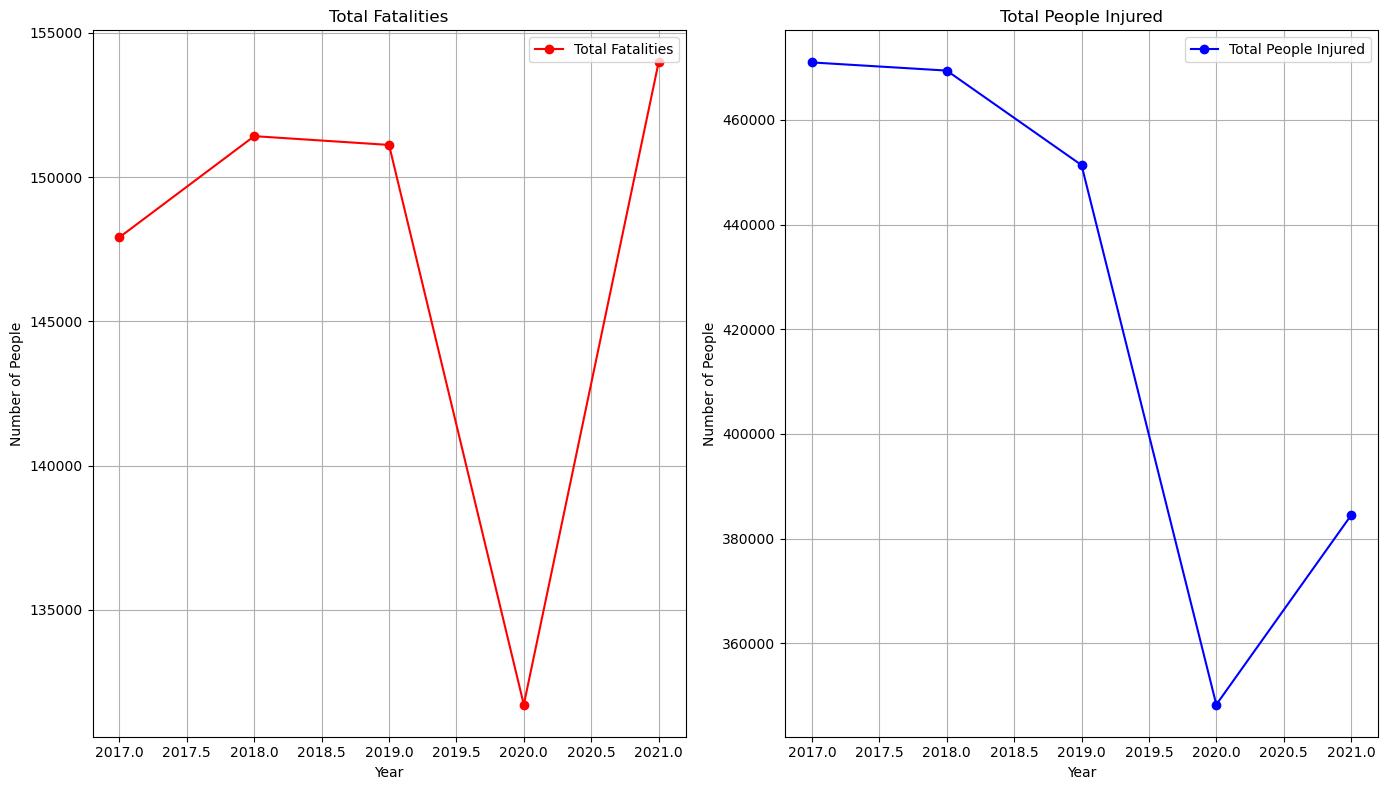

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Line plot for Total Fatalities
axes[0].plot(df['Year'], df['Total Number of Fatalities'], label='Total Fatalities', marker='o', color='red')
axes[0].set_title('Total Fatalities')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of People')
axes[0].legend()
axes[0].grid(True)

# Line plot for Total People Injured
axes[1].plot(df['Year'], df['Total Number of People Injured'], label='Total People Injured', marker='o', color='blue')
axes[1].set_title('Total People Injured')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of People')
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()
plt.show()

To start off, examining the trend depicted in the two line plots, it becomes apparent why 2021 is considered the deadliest year. Although 2017 recorded a high number of injuries, the corresponding death toll was lower compared to 2021.


In 2021, the statistics reveal a grim reality, with over 1.55 lakh lives lost in road crashes across India. This translates to an average of 426 deaths per day or 18 deaths every hour, marking the highest death figures recorded in any calendar year, as per official data.

Contrastingly, the data from 2017 indicates 4.45 lakh accidents, 1.50 lakh deaths, and 4.56 lakh injuries, showcasing a different scenario and emphasizing the concerning rise in fatalities over the years.

[SOURCE FROM NDTV](https://www.ndtv.com/india-news/1-55-lakh-people-died-in-road-crashes-in-india-in-2021-highest-so-far-report-3314598)

#### Road Accident Deaths in India by State (2021)

Lets start with an overview of total road accident deaths in India in 2021
breakdown by each state.

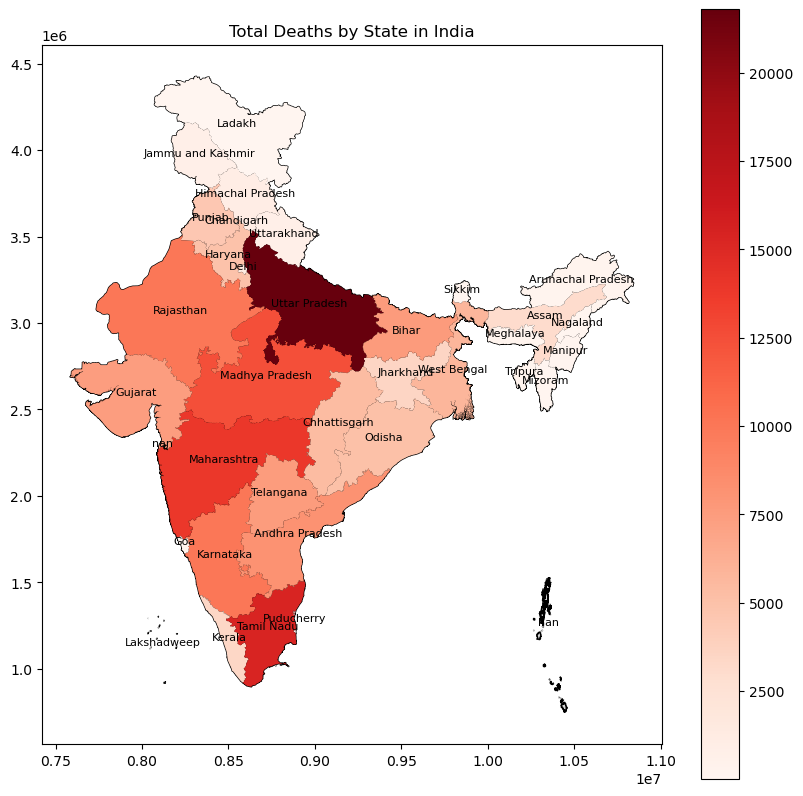

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the India states shapefile
india_states = gpd.read_file('India_State_Shapefile/India_State_Boundary.shp')

state_df = df1[df1['Category'] == 'State']  
groupby_columns = ['Category', 'State/UT/City']

state_totals = df1.groupby(groupby_columns)['Grand Total - Total'].sum().reset_index()

india_states['Name'] = india_states['Name'].str.strip()
state_totals['State/UT/City'] = state_totals['State/UT/City'].str.strip()

name_corrections = {
    
    'Telengana': 'Telangana',
    'Ladakh UT': 'Ladakh',
    'Jammu and Kashmir' : 'Jammu and Kashmir',
    'Chhattishgarh': 'Chhattisgarh',
    'Tamilnadu': 'Tamil Nadu'
}

india_states = india_states.to_crs(epsg=3395)
india_states['Name'] = india_states['Name'].replace(name_corrections)

merged_data = india_states.merge(state_totals, how='left', left_on='Name', right_on='State/UT/City')

#a map plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
india_states.plot(ax=ax, color='lightgrey', edgecolor='black')
merged_data.plot(ax=ax, column='Grand Total - Total', cmap='Reds', legend=True)
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['State/UT/City']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')
plt.title('Total Deaths by State in India')
plt.show()

The map illustrates the distribution of road accident deaths across states in 2021. Among all the states, Tamil Nadu recorded the second-highest number of fatalities, following Uttar Pradesh. The intensity of the red color on the map corresponds to the severity of fatalities, with deeper shades indicating higher numbers of deaths in 2021.

<p>Now, we are delving into an in-depth investigation of Tamil Nadu to understand where things went wrong and how it ranked as the second-highest in road accident fatalities in India.</p>

#### Road Accident Analysis in Tamil Nadu (2021)

Let's start by examining how many injuries and deaths occurred in India due to road accidents.

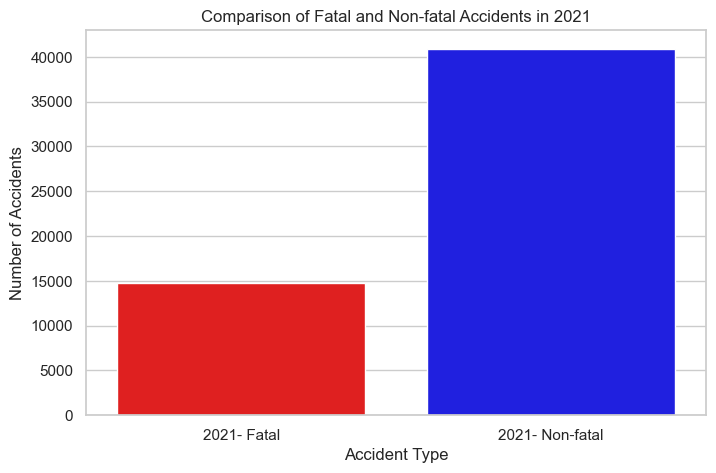

In [37]:
subset_df = df3[['2021- Fatal', '2021- Non-fatal']]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=subset_df.columns, y=subset_df.sum(), palette=['red', 'blue'])

plt.title('Comparison of Fatal and Non-fatal Accidents in 2021')
plt.xlabel('Accident Type')
plt.ylabel('Number of Accidents')
plt.show()

This analysis offers a foundational overview of the road accident data for Tamil Nadu in 2021, elucidating the comprehensive figures of accidents and delineating the incidence of fatal and non-fatal incidents. From the graphical representation, it is evident that among the 40,935 reported accidents, 14,747 resulted in fatalities.

#### Gender-wise Analysis in Tamil Nadu (2021)

Next, As of 2021, Tamil Nadu's population is estimated to be 83.9 million, making it the most populous state in South India. we can now explore the gender distribution of individuals involved in accidents within this demographic.

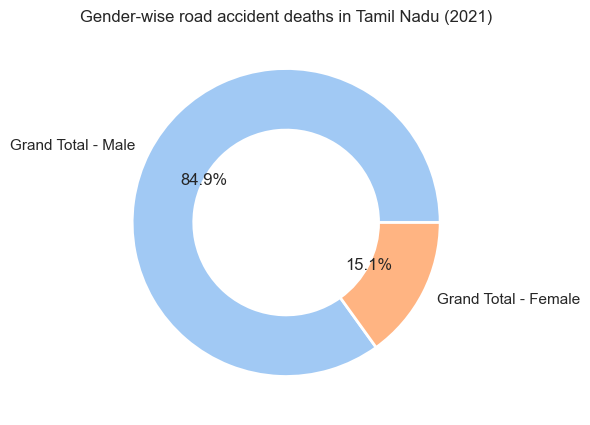

In [38]:
tamilnadu_data = df1[(df1['Category'] == 'State') & (df1['State/UT/City'] == 'Tamil Nadu')]

# Extract gender columns
gender_columns = ['Grand Total - Male', 'Grand Total - Female']
tamilnadu_gender_data = tamilnadu_data[['State/UT/City'] + gender_columns]

# Melt the DataFrame for visualization
tamilnadu_gender_melted = pd.melt(tamilnadu_gender_data, id_vars=['State/UT/City'], value_vars=gender_columns,
                                  var_name='Gender', value_name='Total Count')

sns.set(style="whitegrid")

plt.figure(figsize=(5, 5))
plt.pie(tamilnadu_gender_melted['Total Count'], labels=tamilnadu_gender_melted['Gender'], autopct='%1.1f%%',
        wedgeprops=dict(width=0.4, edgecolor='w', linewidth=2), colors=sns.color_palette("pastel"))


plt.title('Gender-wise road accident deaths in Tamil Nadu (2021)')
plt.show()

In terms of gender-specific road accidents in Tamil Nadu for the year 2021, the data reveals a notable disparity. Among the 40,935 reported incidents, approximately 85% involve males, while females account for around 15% cases.

#### Cause-wise Analysis in Tamil Nadu (2021)

Now, we can explore the leading causes of road accidents in Tamil Nadu in 2021 with highlighting major contributing factors.

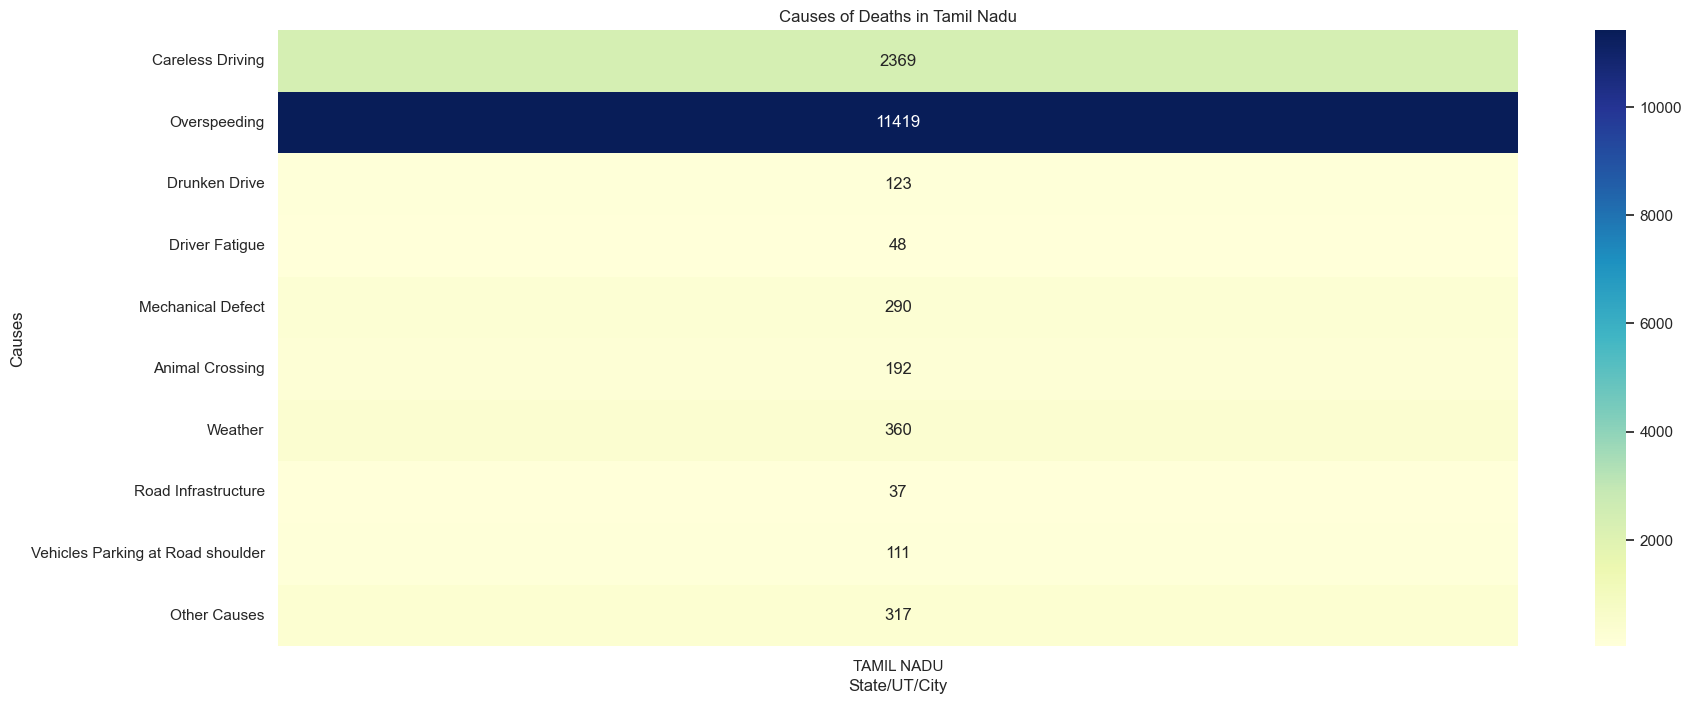

In [40]:
# Filter data for Tamil Nadu
tamil_nadu_data = df2[df2['State/UT/City'] == 'TAMIL NADU']

causes_columns = [
    'Dangerous or Careless Driving/ Overtaking etc Died',
    'Overspeeding Died',
    'Driving under Influence of Drug/Alcohol Died',
    'Physical Fatigue of Drivers Died',
    'Defect in Mechanical Condition of Vehicle Died',
    'Animal Crossing Died',
    'Weather Condition (Total) Died',
    'Lack of Road Infrastructure Died',
    'Vehicles Parking at Road Shoulders Died',
    'Other Causes Died'
]


died_data = tamil_nadu_data[['State/UT/City'] + causes_columns].copy()
died_data.set_index('State/UT/City', inplace=True)

column_mapping = {
    'Dangerous or Careless Driving/ Overtaking etc Died': 'Careless Driving',
    'Overspeeding Died': 'Overspeeding',
    'Driving under Influence of Drug/Alcohol Died': 'Drunken Drive',
    'Physical Fatigue of Drivers Died': 'Driver Fatigue',
    'Defect in Mechanical Condition of Vehicle Died': 'Mechanical Defect',
    'Animal Crossing Died': 'Animal Crossing',
    'Weather Condition (Total) Died': 'Weather',
    'Lack of Road Infrastructure Died': 'Road Infrastructure',
    'Vehicles Parking at Road Shoulders Died': 'Vehicles Parking at Road shoulder',
    'Other Causes Died': 'Other Causes'
}

died_data.rename(columns=column_mapping, inplace=True)

plt.figure(figsize=(20, 8))
sns.heatmap(died_data.T, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Causes of Deaths in Tamil Nadu')
plt.xlabel('State/UT/City')
plt.ylabel('Causes')
plt.show()

Analysis of the heatmap reveals that overspeeding is the primary cause of accidents in Tamil Nadu, contributing approximately 70% to the total incidents. Careless driving follows as the second significant factor leading to road accidents.

#### Death by Type of Vehicles in Tamil Nadu (2021)

Let's examaine the fatalities categorized by the type of vehicles involved in Tamil Nadu.

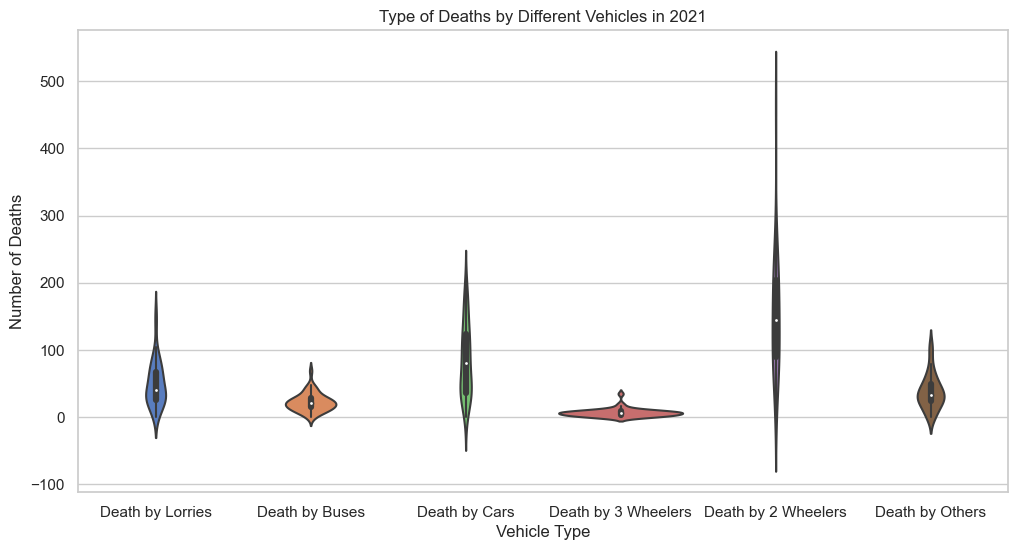

In [41]:
df3 = df3.rename(columns={
    'Death by Lorries - 2021': 'Death by Lorries',
    'Death by Buses-2021': 'Death by Buses',
    'Death by Cars/Jeeps 2021': 'Death by Cars',
    'Death by Three-wheelers - 2021': 'Death by 3 Wheelers',
    'Death by Two-wheelers 2021': 'Death by 2 Wheelers',
    'Death by Others 2021': 'Death by Others'
})

subset_df = df3[['Death by Lorries', 'Death by Buses', 'Death by Cars',
                'Death by 3 Wheelers', 'Death by 2 Wheelers', 'Death by Others']]
subset_df_melted = subset_df.melt()

sns.set(style="whitegrid")

# a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='variable', y='value', data=subset_df_melted, palette='muted')
plt.title('Type of Deaths by Different Vehicles in 2021')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Deaths')
plt.show()

As evident from the violin plot, death caused by two-wheelers made a significant contribution to road accidents in Tamil Nadu in 2021. This was followed by car accidents and accidents involving lorries, indicating the varying degrees of impact each vehicle type had on the overall death count during that year.

#### Type of Vehicles Registered in Tamil Nadu (2021)

Overview of the types of vehicles registered in Tamil Nadu in 2021.
Insights into the vehicular composition.


In [42]:
selected_columns = ["Category of Vehicle", "2020-2021"]

#filtering data
two_wheeler_rows = df5.loc[df5["Category of Vehicle"].isin(["MOTOR CYCLE", "SCOOTER"]), selected_columns]
buses_rows = df5.loc[df5["Category of Vehicle"].isin(["OMNIBUS", "LMV OMNI BUS", "SCHOOL BUS", "MINI BUS"]), selected_columns]
three_wheeler_rows = df5.loc[df5["Category of Vehicle"].isin(["AUTO", "3 WHEELER"]), selected_columns]
trailors_row = df5.loc[df5["Category of Vehicle"].isin(["TRAILORS"]), selected_columns]
motor_car_row = df5.loc[df5["Category of Vehicle"].isin(["MOTOR CAR"]), selected_columns]

two_wheeler_rows["2020-2021"] = pd.to_numeric(two_wheeler_rows["2020-2021"], errors="coerce")
buses_rows["2020-2021"] = pd.to_numeric(buses_rows["2020-2021"], errors="coerce")
three_wheeler_rows["2020-2021"] = pd.to_numeric(three_wheeler_rows["2020-2021"], errors="coerce")
trailors_row["2020-2021"] = pd.to_numeric(trailors_row["2020-2021"], errors="coerce")
motor_car_row["2020-2021"] = pd.to_numeric(motor_car_row["2020-2021"], errors="coerce")

#summarizing data
two_wheeler_sum = two_wheeler_rows["2020-2021"].sum()
buses_sum = buses_rows["2020-2021"].sum()
three_wheeler_sum = three_wheeler_rows["2020-2021"].sum()
trailors_sum = trailors_row["2020-2021"].sum()
motor_car_sum = motor_car_row["2020-2021"].sum()

categories = ["Lorries", "Buses", "Cars", "3 wheelers", "2 wheelers"]
values = [trailors_sum, buses_sum, motor_car_sum, three_wheeler_sum, two_wheeler_sum]


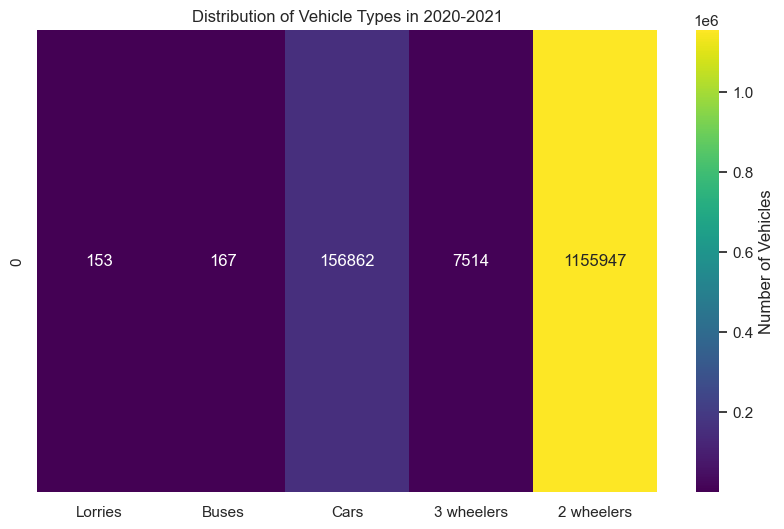

In [43]:
data = {
    "Lorries": [trailors_sum],
    "Buses": [buses_sum],
    "Cars": [motor_car_sum],
    "3 wheelers": [three_wheeler_sum],
    "2 wheelers": [two_wheeler_sum]
}
df_heatmap = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.heatmap(df_heatmap, annot=True, fmt=".0f", cmap="viridis", cbar_kws={'label': 'Number of Vehicles'})
plt.title('Distribution of Vehicle Types in 2020-2021')
plt.show()

The heatmap illustrates that a substantial 86.9% of vehicles registered in 2020-2021 were two-wheelers. This high percentage underscores the dominance of two-wheelers on the roads.

The correlation between the high registration of two-wheelers and the significant contribution to road accident deaths suggests a potential link between the prevalence of a vehicle type and its involvement in fatal accidents.


#### Time of Occurrence in a Day in Tamil Nadu (2021)

Analysis of road accidents based on the time of day in Tamil Nadu and
identification of peak hours and trends.

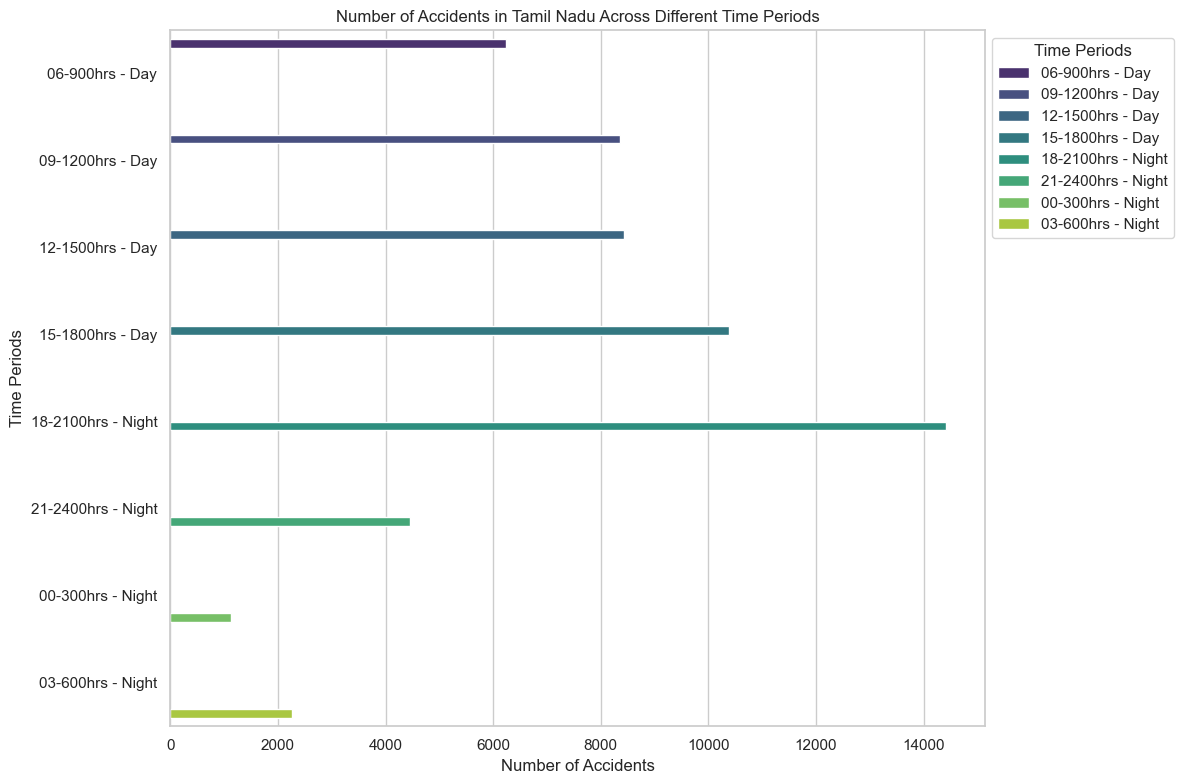

In [44]:
tn_data = df4[df4['States/UTs'] == 'Tamil Nadu']
tn_data = tn_data.drop(columns=['Total Accidents', 'Unknown Time'])
tn_data_melted = tn_data.melt(id_vars=['States/UTs'], var_name='Time Period', value_name='Number of Accidents')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Accidents', y='Time Period', hue='Time Period', data=tn_data_melted, palette='viridis')
plt.title('Number of Accidents in Tamil Nadu Across Different Time Periods')
plt.xlabel('Number of Accidents')
plt.ylabel('Time Periods')
plt.legend(title='Time Periods', bbox_to_anchor=(1, 1), loc='upper left')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

Most accidents in Tamil Nadu are occurring during the time frame of 18:00 to 21:00 (6:00 PM to 9:00 PM), particularly at night. This peak hour coincides with the time when citizens are typically commuting back home from their offices. This insight is derived from the data on the number of accidents in Tamil Nadu across different time periods.

### WordCloud

#### Webscarping

In [46]:
import requests
import bs4

# URL of the article
url = "https://www.thehindu.com/news/national/tamil-nadu/fast-and-furious-tn-road-saga/article65876800.ece"

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the headings
    headings = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])

    # Extract and print the text content of the headings
    for heading in headings:
        print(heading.text.strip())

    # Save the headings to a text file
    with open("article_headings.txt", "w", encoding="utf-8") as file:
        for heading in headings:
            file.write(heading.text.strip() + "\n")
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")

Fast and furious: Tamil Nadu road saga
Premium
With close to 1,000 lives lost and over 5,000 injured in 2021, Tamil Nadu’s capital topped many undesirable lists as far as road accidents go. Among States, T.N. stood first in terms of per capita deaths.
Pandemic impact
Design flaws
Manpower crunch
Tools and processes
A scientific study
Bus accidents go up
Related Topics
Top News Today
The Hindu
Contact us
Group News Sites
Other Products
Popular Sections
Opinion
Business
Sport
Sci-Tech
States
Cities
Trending on thehindu.com
Trending on our Group sites
Comments


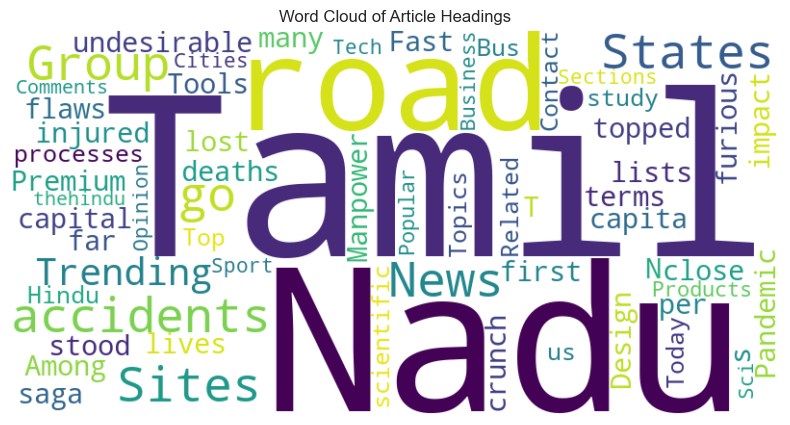

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open("article_headings.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("Word Cloud of Article Headings")
plt.show()

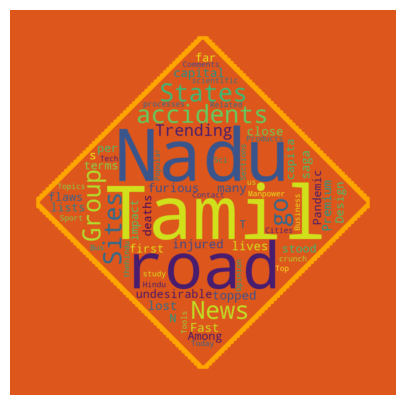

In [48]:
# Read the content of the text file
with open("article_headings.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# Load image
mask_image = np.array(Image.open('road.jpg'))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, height=400, background_color='#DD571C', stopwords=stopwords,
                      mask=mask_image, contour_width=10, contour_color='orange').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

#### Results of the Wordcloud

This snapshot of insights derived from the word cloud serves as a compelling call to action. It emphasizes the urgent need for targeted interventions, policy reforms, and community engagement to mitigate the impact of road accidents in Tamil Nadu.

## Conclusion

In conclusion, the 2021 road accident data for Tamil Nadu underscores the urgency for comprehensive and targeted interventions in areas such as overspeeding, two-wheeler safety, and evening commute hours. This research contributes significantly to the broader conversation on road safety in India and provides valuable insights that can guide future policies and initiatives aimed at reducing accidents and fatalities.

## References:

1. Tiwari, A. (2020). India-State-and-Country-Shapefile-Updated-Jan-2020. Github repository. [https://github.com/AnujTiwari/India-State-and-Country-Shapefile-Updated-Jan-2020]
1. Government of India. (2021). State/UT/City-wise Road Accident Deaths During 2021. Open Government Data (OGD) Platform India. [https://data.gov.in/resource/stateutscity-wise-road-accident-deaths-during-2021]
1. Vaidyanathan R. (2023). Tamil Nadu - Crime Data - Tamil Nadu District and Citywise Road Accident Deaths in 2019 to 2021. OpenCity - Urban Data Portal. [https://data.opencity.in/dataset/tamil-nadu-crime-data/resource/tamil-nadu-district-and-citywise-road-accident-deaths-in-2019-to-2021]
1. Tamil Nadu - Vehicle Registration Data - Collections - OpenCity - Urban Data Portal. [https://data.opencity.in/dataset/tamil-nadu-vehicles-registration-data]
1. Government of India. (2021). State/UT/City-wise Time Occurrence Number of Traffic Accidents During 2021. Open Government Data (OGD) Platform India. [https://data.gov.in/resource/stateutscity-wise-time-occurrence-number-traffic-accidents-during-2021]
1. Government of India. (2023). State-UT Wise Total Number of Road Accidents in India Classified According to Cause of Accidents. Open Government Data (OGD) Platform India. [https://data.gov.in/catalog/state-ut-wise-total-number-road-accidents-india-classified-according-cause-accidents]
1. Government of India. (2017-2021). Year-wise Total Number of Road Accident Fatalities and Injuries in the Country from 2017 to 2021. Open Government Data (OGD) Platform India. [https://data.gov.in/dataset-group-name/road-accidents]